# **PREDICT EXECUTION TIME OF A PROGRAM WITH GIVEN THE NUMBERS OF INPUT**

---
## ***- Thành viên nhóm:***

Trịnh Tuấn Nam      -    19521874

Nguyễn Dương Hải    -    19521464

## ***- Nguồn tham khảo:***

https://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model

https://scikit-learn.org/stable/modules/linear_model.html#generalized-linear-regression





***CÁC THƯ VIỆN CẦN DÙNG:***

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

***ĐỌC FILE - TÁCH DỮ LIỆU:***

In [2]:
colnames = ['Size of file', 'Running time']
file_train = pd.read_csv("http://cs.uit.edu.vn/data2.txt", names=colnames)
file_test = pd.read_csv("https://cs.uit.edu.vn/data3.txt", names=colnames)

# Dữ liệu train từ data2
x_train = np.array(file_train['Size of file']).reshape(-1, 1)
y_train = np.array(file_train['Running time'])
# Dữ liệu test data3
x_test = np.array(file_test['Size of file']).reshape(-1, 1)
y_test = np.array(file_test['Running time'])

**TRỰC QUAN HÓA DỮ LIỆU VÀ TÍNH MSE BAN ĐẦU BAN ĐẦU SỬ DỤNG "Linear Regression"**

* Mean square error of data train: 0.00014337728721748835
- Time average: 0.40678508822553616
- Error: 2.943575334803937 %

* Mean square error of data test: 0.020664949397549082
- Time average: 2.642811968838527
- Error: 5.439398887357004 %



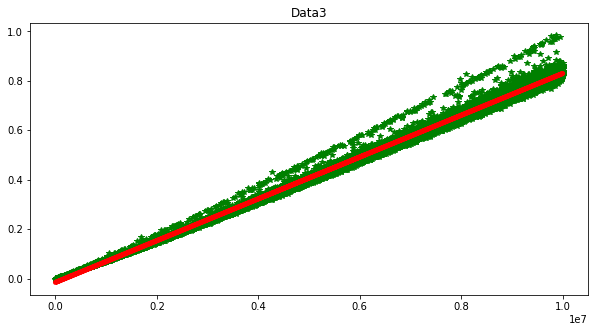

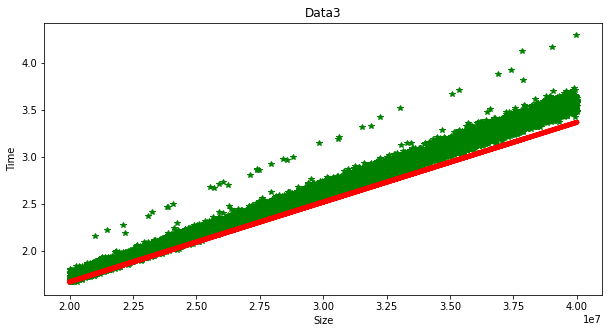

----------------------------------------------------------------------------------------------------


In [5]:
model0 = LinearRegression().fit(x_train, y_train)

# Mean squared error of data train
y_train_pred_0 = model0.predict(x_train)
print('* Mean square error of data train:', mean_squared_error(y_train, y_train_pred_0))
print('- Time average:', np.average(y_train))
print('- Error:', np.sqrt(mean_squared_error(y_train, y_train_pred_0))*100/np.average(y_train), '%\n')

_, ax0_train = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
ax0_train.plot(x_train, y_train, "*", color='green')
ax0_train.plot(x_train, y_train_pred_0, color='red', linewidth=5)
ax0_train.set_title("Data3")

# Mean squared error of data test
y_test_pred_0 = model0.predict(x_test)
print('* Mean square error of data test:', mean_squared_error(y_test, y_test_pred_0))
print('- Time average:', np.average(y_test))
print('- Error:', np.sqrt(mean_squared_error(y_test, y_test_pred_0))*100/np.average(y_test), '%\n')

_, ax0_test = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
ax0_test.plot(x_test, y_test, "*", color='green')
ax0_test.plot(x_test, y_test_pred_0, color='red', linewidth=5)
ax0_test.set_title("Data3")
ax0_test.set(xlabel='Size', ylabel='Time')

plt.show()
print('-'*100)

**THỰC HIỆN SCALE DỮ LIỆU VÀ TÍNH MSE SAU KHI ĐÃ SCALE**

* Mean square error of data train scaled: 0.00014337728721748832
- Time average: 0.40678508822553616
- Error: 2.943575334803937 %

* Mean square error of data test scaled: 0.020664949397549173
- Time average: 2.642811968838527
- Error: 5.439398887357017 %



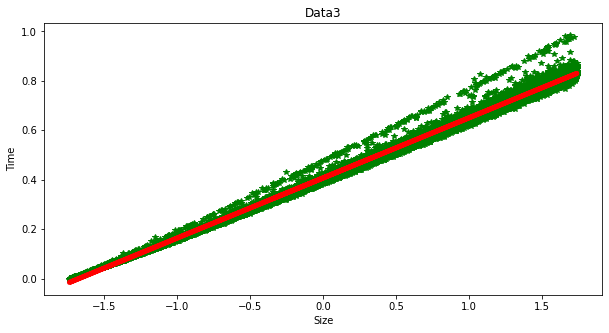

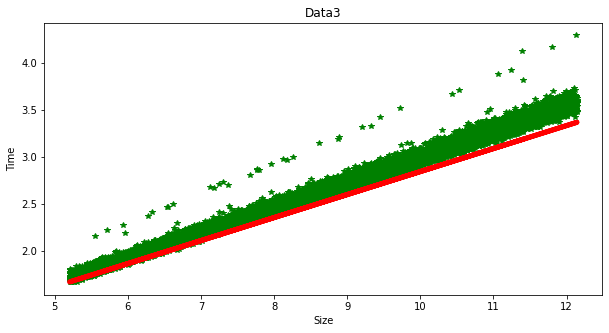

----------------------------------------------------------------------------------------------------


In [6]:
# Scale dữ liệu
# Đối với tập x_train, chúng ta thực hiện "fit_transform", vì chúng ta cần tính toán trung bình
# và tiêu chuẩn, sau đó sử dụng nó để tự động xác định dữ liệu. Đối với x_test,
# chúng ta đã có giá trị trung bình và tiêu chuẩn, vì vậy chúng ta chỉ thực hiện phần "transform".
def scale1(x_train, x_test):
    scale = StandardScaler()
    x_train = scale.fit_transform(x_train)
    x_test = scale.transform(x_test)
    return x_train, x_test

x_train_scaled, x_test_scaled = scale1(x_train, x_test)
model0_scaled = LinearRegression().fit(x_train_scaled, y_train)

# Mean squared error of data train scaled
y_train_pred_0 = model0_scaled.predict(x_train_scaled)
print('* Mean square error of data train scaled:', mean_squared_error(y_train, y_train_pred_0))
print('- Time average:', np.average(y_train))
print('- Error:', np.sqrt(mean_squared_error(y_train, y_train_pred_0))*100/np.average(y_train), '%\n')

_, ax0_train = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
ax0_train.plot(x_train_scaled, y_train, "*", color='green')
ax0_train.plot(x_train_scaled, y_train_pred_0, color='red', linewidth=5)
ax0_train.set_title("Data3")
ax0_train.set(xlabel='Size', ylabel='Time')

# Mean squared error of data test scaled
y_test_pred_0 = model0_scaled.predict(x_test_scaled)
print('* Mean square error of data test scaled:', mean_squared_error(y_test, y_test_pred_0))
print('- Time average:', np.average(y_test))
print('- Error:', np.sqrt(mean_squared_error(y_test, y_test_pred_0))*100/np.average(y_test), '%\n')

_, ax0_test = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
ax0_test.plot(x_test_scaled, y_test, "*", color='green')
ax0_test.plot(x_test_scaled, y_test_pred_0, color='red', linewidth=5)
ax0_test.set_title("Data3")
ax0_test.set(xlabel='Size', ylabel='Time')

plt.show()
print('-'*100)

**HÃY THỬ VỚI NHỮNG MÔ HÌNH "Linear Regression" KHÁC XEM SAO ?**

1/ x = x * log(x)

In [8]:
def feature1(x):
    return x * np.log(x)

model1 = LinearRegression().fit(feature1(x_train), y_train)

# Mean squared error of data train when x_train=x*log(x)
y_train_pred_1 = model1.predict(feature1(x_train))
print('* Mean square error of data train when x_train = x*log(x):', mean_squared_error(y_train, y_train_pred_1))
print('- Time average:', np.average(y_train))
print('- Error:', np.sqrt(mean_squared_error(y_train, y_train_pred_1))*100/np.average(y_train), '%\n')

# Mean squared error of data test when x_train=x*log(x)
y_test_pred_1 = model1.predict(feature1(x_test))
print('* Mean square error of data test when x_train = x*log(x):', mean_squared_error(y_test, y_test_pred_1))
print('- Time average:', np.average(y_test))
print('- Error:', np.sqrt(mean_squared_error(y_test, y_test_pred_1))*100/np.average(y_test), '%\n')

print('-'*100)

* Mean square error of data train when x_train = x*log(x): 0.00012203439798746085
- Time average: 0.40678508822553616
- Error: 2.715664450573088 %

* Mean square error of data test when x_train = x*log(x): 0.005344034781896934
- Time average: 2.642811968838527
- Error: 2.7661031616759035 %

----------------------------------------------------------------------------------------------------


2/ x = x^2

In [9]:
def feature2(x):
    return x**2

model2 = LinearRegression().fit(feature2(x_train), y_train)

# Mean squared error of data train when x_train = x^2
y_train_pred_2 = model2.predict(feature2(x_train))
print('* Mean square error of data train when x_train = x^2:', mean_squared_error(y_train, y_train_pred_2))
print('- Time average:', np.average(y_train))
print('- Error:', np.sqrt(mean_squared_error(y_train, y_train_pred_2))*100/np.average(y_train), '%\n')

# Mean squared error of data test when x_train = x^2
y_test_pred_2 = model2.predict(feature2(x_test))
print('* Mean square error of data test when x_train = x^2:', mean_squared_error(y_test, y_test_pred_2))
print('- Time average:', np.average(y_test))
print('- Error:', np.sqrt(mean_squared_error(y_test, y_test_pred_2))*100/np.average(y_test), '%\n')

print('-'*100)

* Mean square error of data train when x_train = x^2: 0.0033353302931308356
- Time average: 0.40678508822553616
- Error: 14.197255548532892 %

* Mean square error of data test when x_train = x^2: 29.339697759997065
- Time average: 2.642811968838527
- Error: 204.95643239725976 %

----------------------------------------------------------------------------------------------------


3/ x = sqr(x)

In [10]:
def feature3(x):
    return np.sqrt(x)

model3 = LinearRegression().fit(feature3(x_train), y_train)

# Mean squared error of data train when x_train = sqr(x)
y_train_pred_3 = model3.predict(feature3(x_train))
print('* Mean square error of data train when x_train = sqr(x):', mean_squared_error(y_train, y_train_pred_3))
print('- Time average:', np.average(y_train))
print('- Error:', np.sqrt(mean_squared_error(y_train, y_train_pred_3))*100/np.average(y_train), '%\n')

# Mean squared error of data test when x_train = sqr(x)
y_test_pred_3 = model3.predict(feature3(x_test))
print('* Mean square error of data test when x_train = sqr(x):', mean_squared_error(y_test, y_test_pred_3))
print('- Time average:', np.average(y_test))
print('- Error:', np.sqrt(mean_squared_error(y_test, y_test_pred_3))*100/np.average(y_test), '%\n')

print('-'*100)

* Mean square error of data train when x_train = sqr(x): 0.0029629838236181426
- Time average: 0.40678508822553616
- Error: 13.38134031649116 %

* Mean square error of data test when x_train = sqr(x): 1.5021666366532145
- Time average: 2.642811968838527
- Error: 46.37594699795457 %

----------------------------------------------------------------------------------------------------


4/ x = log(x)

In [11]:
def feature4(x):
    return np.log(x)

model4 = LinearRegression().fit(feature4(x_train), y_train)

# Mean squared error of data train when x_train = log(x)
y_train_pred_4 = model4.predict(feature4(x_train))
print('* Mean square error of data train when x_train = log(x):', mean_squared_error(y_train, y_train_pred_4))
print('- Time average:', np.average(y_train))
print('- Error:', np.sqrt(mean_squared_error(y_train, y_train_pred_4))*100/np.average(y_train), '%\n')

# Mean squared error of data test when x_train = log(x)
y_test_pred_4 = model4.predict(feature4(x_test))
print('* Mean square error of data test when x_train = log(x):', mean_squared_error(y_test, y_test_pred_4))
print('- Time average:', np.average(y_test))
print('- Error:', np.sqrt(mean_squared_error(y_test, y_test_pred_4))*100/np.average(y_test), '%\n')

print('-'*100)

* Mean square error of data train when x_train = log(x): 0.015911124262733084
- Time average: 0.40678508822553616
- Error: 31.008832093072673 %

* Mean square error of data test when x_train = log(x): 3.495112482555936
- Time average: 2.642811968838527
- Error: 70.73987915558043 %

----------------------------------------------------------------------------------------------------


5/ *Phương pháp "Linear Regression" nhiều biến*: x = [x, x^2, x*log(x), log(x)]

In [12]:
X_train_new = []
x_train = file_train['Size of file']
for x in x_train:
    X_train_new.append([x, x**2, x * np.log(x), np.log(x)])

X_test_new = []
x_test = file_test['Size of file']
for x in x_test:
    X_test_new.append([x, x**2, x*np.log(x), np.log(x)])

model5 = LinearRegression().fit(X_train_new, y_train)

# Mean squared error of data train when x_train[i] = [x,x^2,x*log(x),log(x)]
y_train_pred_5 = model5.predict(X_train_new)
print('* Mean square error of data train when x_train[i]=[x, x^2, xlog(x), log(x)]:', mean_squared_error(y_train, y_train_pred_5))
print('- Time average:', np.average(y_train))
print('- Error:', np.sqrt(mean_squared_error(y_train, y_train_pred_5))*100/np.average(y_train), '%\n')

# Mean squared error of data test when x_train[i] = [x,x^2,x*log(x),log(x)]
y_test_pred_5 = model5.predict(X_test_new)
print('* Mean square error of data test when x_train[i]=[x, x^2, xlog(x), log(x)]:', mean_squared_error(y_test, y_test_pred_5))
print('- Time average:', np.average(y_test))
print('- Error:', np.sqrt(mean_squared_error(y_test, y_test_pred_5))*100/np.average(y_test), '%\n')

* Mean square error of data train: 0.00012190225045315814
- Time average: 0.40678508822553616
- Error: 2.7141936949019554 %

* Mean square error of data test when x_train[i]=[x,x^2,xlog(x),log(x)]: 0.004181195754594616
- Time average: 2.642811968838527
- Error: 2.446718385312817 %

